In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x "/content/drive/My Drive/ferdowsi-data.rar" "/content/drive/My Drive/"

In [ ]:
# import pandas as pd
# import json

# with open('drive/MyDrive/Spad/ferdowsi-data.txt','r') as f:
#     data = json.loads(f.read())

# df = pd.json_normalize(data)

In [ ]:
pip install ijson

     |████████████████████████████████| 126 kB 5.3 MB/s 


<Figure size 1080x1080 with 0 Axes>

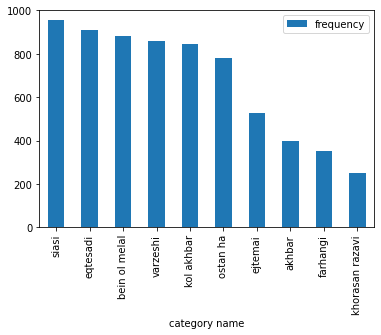

In [ ]:
import io
import ijson
import json
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import json
from google.colab import drive


# read 10000 first data

with open('drive/MyDrive/Spad/ferdowsi-data.txt', encoding="UTF-8") as json_file:
    # cursor = 0
    count = 0
    jsonString = "[\n"
    # s = ""
    countObject = 0
    for line_number, line in enumerate(json_file):
        
       line_as_file = io.StringIO(line)
       count += 1

       if count != 4 and count!= 13  :

        if count == 12 :
         jsonString += line
         jsonString += ","

        else :
         jsonString += line 
        
         
        if count  == 16  :
          count = 0
          countObject += 1

          if  countObject<10000  : 
           jsonString += ","

        if countObject == 10000 :
          break
 
jsonString += "]"

# conver json to dataframe

with open('data.json', 'w') as f:
    json.dump(jsonString, f)
with open('data.json') as json_file1:
  data = json.load(json_file1) 
df = pd.read_json(StringIO(data))
df.to_csv()

plt.figure(figsize=(15,15))

catName=['siasi', 'eqtesadi', 'bein ol melal','varzeshi','kol akhbar','ostan ha', 'ejtemai' , 'akhbar' , 'farhangi' , 'khorasan razavi']
cat = pd.DataFrame(df, columns= ['category'])
dups_cat = cat.pivot_table(columns=['category'], aggfunc='size')
dups_cat = dups_cat.sort_values(ascending=False)
dups_cat = dups_cat[:10]
catfre = dups_cat.values.tolist()
catId = dups_cat.index.tolist()
dfCat = pd.DataFrame({'category name':catName, 'frequency':catfre})
dfCat.plot.bar(x = 'category name' , y = 'frequency')


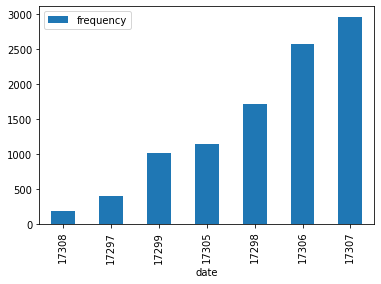

In [ ]:

date = pd.DataFrame(df, columns= ['date_created'])
date['date_created'] = date['date_created'].apply(lambda x: int(x/86400))

dups_date = date.pivot_table(columns=['date_created'], aggfunc='size')

dups_date = dups_date.sort_values()

dfdate = pd.DataFrame({'date':dups_date.index.tolist(), 'frequency':dups_date.values.tolist()})
dfdate.plot.bar(x = 'date' , y = 'frequency')

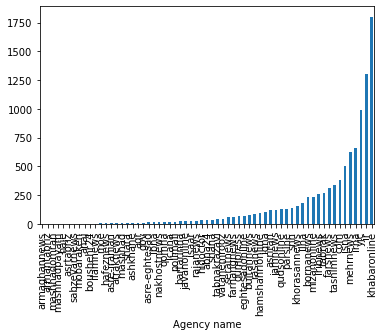

In [ ]:

agyName = pd.DataFrame(df, columns= ['url'])
from urllib.parse import urlparse
agancyNames = agyName.values.tolist()
for i in range(len(agancyNames)) :
  agancyNames[i] = urlparse(agancyNames[i][0]).netloc
  agancyNames[i] = agancyNames[i].split('.')[1]


urldf = pd.DataFrame({'Agency name':agancyNames})
dupsAgyName = urldf.pivot_table(columns= 'Agency name', aggfunc='size')
dupsAgyName = dupsAgyName.sort_values()
dupsAgyName.plot.bar()